In [1]:
import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib
import IPython
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Softmax Regression

Define Softmax model which allows for non-binary outcomes

Note: the current version of the Softmax function here uses Gradient Descent

In [2]:
class Softmax:
    
    def __init__(self,eta,nepochs,lam):
        self.nepochs = nepochs
        self.eta = eta
        self.lam = lam
    
    def OneHot(self,y):
        hot_mat = np.zeros((len(y), len(np.unique(y))))
        for i, val in enumerate(y):
            hot_mat[i, val] = 1
        return hot_mat
        
    def net_input(self,x):
        return x.dot(self.weights) + self.bias
    
    def softmax(self,z):
        return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T      
    
    def fit(self,x,y):
        self.num_outcomes = len(np.unique(y))
        self.weights = np.random.random((len(x[0]),self.num_outcomes))
        self.bias = np.random.random(self.num_outcomes)
        
        y = self.OneHot(y)
        
        for i in range(self.nepochs):
            net_input = self.net_input(x)
            softmax = self.softmax(net_input)
            error = softmax - y
            
            grad = np.dot(x.T,error)
            
            self.weights -= self.eta*(grad + self.lam*self.weights)
            self.bias -= self.eta*np.sum(error,axis=0)
            
        return self
    
    def predict(self,x):
        net_input = self.net_input(x)
        softmax = self.softmax(net_input)
        return softmax.argmax(axis=1)
        

# MNIST Dataset

## Single layered Neural Network (Softmax)

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

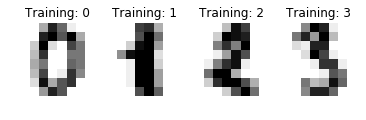

In [4]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

Input of the dataset is the number of pixels in the non-overlapping 4x4 sub-martix of the 32x32 bitmaps of each image generating an 8x8 matrix for each image 

In [5]:
X = digits.data
y = digits.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [8]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
soft = Softmax(0.01,10,12)

In [10]:
soft.fit(X_train,y_train)

In [11]:
ypred = soft.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, ypred))

Accuracy: 0.95
